In [24]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

-----

# AE (Auto Encoder)

In [25]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

# configure
encoding_dim = 32
input_img = Input(shape=(784,))


# layers
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)


# Models
autoencoder = Model(input_img, decoded) # autoencoder

encoder = Model(input_img, encoded) # encoder

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input)) # decoder

In [4]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def recall(y_true, y_pred):
    y_true_yn = K.round(K.clip(y_true, 0, 1))
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))

    count_true_positive = K.sum(y_true_yn * y_pred_yn)
    count_true_positive_false_negative = K.sum(y_true_yn)
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall


# train autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=[rmse, recall])
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# encoding result
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.3601 - rmse: 0.3039 - recall: 0.2390 - val_loss: 0.2703 - val_rmse: 0.2595 - val_recall: 0.2043
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2626 - rmse: 0.2538 - recall: 0.2422 - val_loss: 0.2512 - val_rmse: 0.2460 - val_recall: 0.3215
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2410 - rmse: 0.2373 - recall: 0.3931 - val_loss: 0.2287 - val_rmse: 0.2281 - val_recall: 0.4780
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2205 - rmse: 0.2210 - recall: 0.5166 - val_loss: 0.2101 - val_rmse: 0.2132 - val_recall: 0.5599
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2047 - rmse: 0.2085 - recall: 0.5910 - val_loss: 0.1970 - val_rmse: 0.2027 - val_recall: 0.6182
Epoch 6/50
60000/60000 [==============================] - 2s 30us

Epoch 47/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1042 - rmse: 0.1106 - recall: 0.8499 - val_loss: 0.1024 - val_rmse: 0.1085 - val_recall: 0.8551
Epoch 48/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1038 - rmse: 0.1100 - recall: 0.8509 - val_loss: 0.1020 - val_rmse: 0.1081 - val_recall: 0.8541
Epoch 49/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1034 - rmse: 0.1095 - recall: 0.8517 - val_loss: 0.1016 - val_rmse: 0.1075 - val_recall: 0.8561
Epoch 50/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1030 - rmse: 0.1091 - recall: 0.8525 - val_loss: 0.1012 - val_rmse: 0.1070 - val_recall: 0.8609


In [5]:
np.set_printoptions(suppress=True)

In [6]:
encoded_imgs.shape

(10000, 32)

In [7]:
encoded_imgs

array([[ 6.3763433 , 10.697407  ,  6.32076   , ...,  1.0930234 ,
         4.918487  ,  0.96055055],
       [10.730854  ,  4.0360937 , 11.519238  , ...,  2.345777  ,
         6.7017703 ,  8.453162  ],
       [ 0.11287993,  1.6944015 ,  6.056198  , ...,  2.642245  ,
         1.2720426 ,  2.938009  ],
       ...,
       [ 9.286157  ,  4.192349  , 15.971061  , ...,  7.5206766 ,
         9.507512  ,  4.18503   ],
       [ 9.254978  ,  0.        , 10.685984  , ...,  2.9746552 ,
         8.3398485 ,  3.0615594 ],
       [ 9.218382  ,  6.188239  , 18.660156  , ...,  9.215693  ,
        13.732598  , 18.18651   ]], dtype=float32)

In [8]:
decoded_imgs

array([[0.00003127, 0.0000094 , 0.00001687, ..., 0.00002388, 0.00000471,
        0.00001549],
       [0.00000545, 0.00000814, 0.00004065, ..., 0.00006705, 0.00001795,
        0.00001101],
       [0.00021891, 0.00011071, 0.00018751, ..., 0.00011635, 0.00006125,
        0.00013148],
       ...,
       [0.00000003, 0.00000001, 0.00000001, ..., 0.00000001, 0.00000001,
        0.00000001],
       [0.00000085, 0.00000016, 0.00000244, ..., 0.00000174, 0.00000092,
        0.00000097],
       [0.        , 0.        , 0.00000026, ..., 0.00000004, 0.00000004,
        0.        ]], dtype=float32)

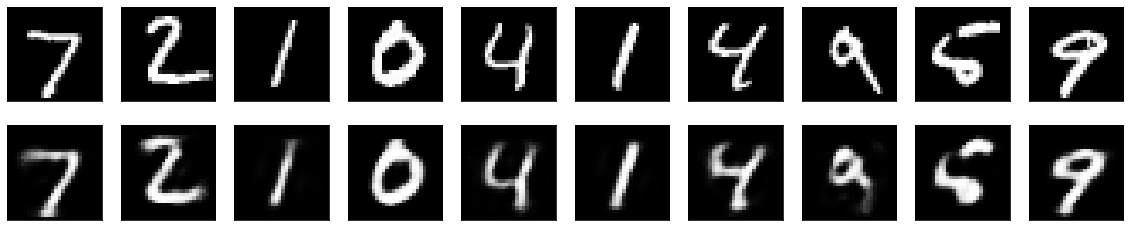

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
encoded_imgs.shape

(10000, 32)

-----

# Projected vector (feature reduction test)

In [11]:
feature_cols=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 
              'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 
              'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 
              'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 
              'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31']
df = pd.DataFrame(encoded_imgs, columns=feature_cols)

k: 1 | cost: 4758724.5801922325
k: 2 | cost: 3816152.5562725374
k: 3 | cost: 3557510.4202446467
k: 4 | cost: 3345392.245199546
k: 5 | cost: 3206985.177979756
k: 6 | cost: 3079228.072029741
k: 7 | cost: 2965349.784726162
k: 8 | cost: 2885292.093935602
k: 9 | cost: 2814794.611192748
k: 10 | cost: 2750466.9586672634
k: 11 | cost: 2686893.7413742524
k: 12 | cost: 2630499.212320446
k: 13 | cost: 2570749.053694904
k: 14 | cost: 2522300.11913658


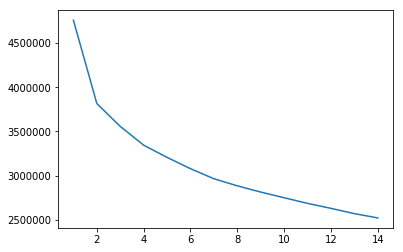

In [12]:
from sklearn.cluster import KMeans

X = df

k_list = []
cost_list = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [15]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300)
transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()

-----

# Classification using reducted feature

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.utils import np_utils
import keras

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

reducted_x_train = encoder.predict(x_train)
reducted_x_test = encoder.predict(x_test)

In [33]:
model=Sequential()
model.add(Dense(64, activation='relu', input_dim=encoding_dim))
model.add(layers.Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit(reducted_x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(reducted_x_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 25us/step - loss: 1.3601 - acc: 0.5836 - val_loss: 0.4691 - val_acc: 0.8634
Epoch 2/10
48000/48000 [==============================] - 1s 17us/step - loss: 0.6316 - acc: 0.7998 - val_loss: 0.3434 - val_acc: 0.8994
Epoch 3/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.5076 - acc: 0.8419 - val_loss: 0.2789 - val_acc: 0.9142
Epoch 4/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.4422 - acc: 0.8626 - val_loss: 0.2475 - val_acc: 0.9253
Epoch 5/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.4038 - acc: 0.8777 - val_loss: 0.2302 - val_acc: 0.9323
Epoch 6/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.3703 - acc: 0.8868 - val_loss: 0.2115 - val_acc: 0.9371
Epoch 7/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.3475 - acc: 0.8932 - val_loss: 0.1963 - val_acc